<a href="https://colab.research.google.com/github/aloiswirth/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fcb55712b80>>

**Preparing the image data**

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [12]:
train_images.shape

(60000, 784)

**"Fitting" the model**

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 19s 34ms/step - loss: 0.2551 - accuracy: 0.9264
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.1044 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0678 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0495 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0373 - accuracy: 0.9887


**Using the model to make predictions**

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 74ms/step


array([1.0017349e-07, 1.1504426e-09, 2.4508222e-06, 6.8394071e-04,
       2.5685736e-12, 4.7543509e-08, 3.4561658e-14, 9.9931103e-01,
       2.6661090e-07, 2.2312711e-06], dtype=float32)

In [15]:
predictions[0].argmax()

7

In [16]:
predictions[0][7]

0.99931103

In [17]:
test_labels[0]

7

**Evaluating the model on new data**

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9783
test_acc: 0.9782999753952026


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [19]:
import numpy as np
x = np.array(12)
x

array(12)

In [20]:
x.ndim

0

### Vectors (rank-1 tensors)

In [21]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [22]:
x.ndim

1

### Matrices (rank-2 tensors)

In [23]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [24]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [25]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
train_images.ndim

3

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

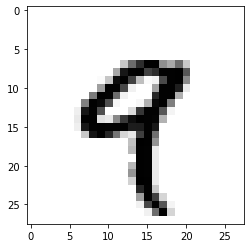

In [29]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [30]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [31]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [32]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [33]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images[:, 14:, 14:]

In [35]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [36]:
batch = train_images[:128]

In [37]:
batch = train_images[128:256]

In [38]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [39]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [40]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [41]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(10000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.07 s


In [42]:
t0 = time.time()
for _ in range(10000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 22.29 s


### Broadcasting

In [43]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))
print(y)

[0.86963167 0.39192957 0.56644726 0.06380951 0.43358142 0.83248344
 0.36464426 0.55342016 0.79056466 0.96446369]


In [44]:
y = np.expand_dims(y, axis=0)
y

array([[0.86963167, 0.39192957, 0.56644726, 0.06380951, 0.43358142,
        0.83248344, 0.36464426, 0.55342016, 0.79056466, 0.96446369]])

In [45]:
Y = np.concatenate([y] * 32, axis=0)

In [46]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [47]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
t0 = time.time()
for _ in range(1000):
    z = np.maximum(x, y)

print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.50 s


### Tensor product

In [48]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

9.183897724901517

In [49]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [50]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [51]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [52]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [53]:
train_images = train_images.reshape((60000, 28 * 28))

In [54]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [55]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [56]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [57]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [58]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [59]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [60]:
W

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.3542565 , 0.75929284],
       [0.83937395, 0.7788218 ]], dtype=float32)>

In [61]:
b

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [62]:
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.60476923, 0.81466866],
       [0.5185199 , 0.0834949 ]], dtype=float32)>

In [63]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.1232891 , 1.1232891 ],
        [0.89816356, 0.89816356]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [64]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [65]:
model = keras.Sequential([
    layers.Dense(784, activation="relu"),
    # layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [66]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [67]:
# model with 512 neurons
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2383 - accuracy: 0.9310
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0932 - accuracy: 0.9719
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0604 - accuracy: 0.9814
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0431 - accuracy: 0.9868
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0320 - accuracy: 0.9903


In [68]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0613 - accuracy: 0.9816
test_acc: 0.9815999865531921


In [69]:
# model with 784 neurons
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0241 - accuracy: 0.9927
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0177 - accuracy: 0.9949
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0128 - accuracy: 0.9960
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0103 - accuracy: 0.9970
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0078 - accuracy: 0.9977


In [70]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0796 - accuracy: 0.9799
test_acc: 0.9799000024795532


Result: the number of neurons is not really relevant. In this case the smaller  
neural network has less overfitting and a slightly better accuracy even. 

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [71]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [72]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [73]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [74]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [75]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [76]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [77]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [78]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [79]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.90
loss at batch 100: 2.20
loss at batch 200: 2.19
loss at batch 300: 2.06
loss at batch 400: 2.19
Epoch 1
loss at batch 0: 1.89
loss at batch 100: 1.85
loss at batch 200: 1.82
loss at batch 300: 1.69
loss at batch 400: 1.81
Epoch 2
loss at batch 0: 1.58
loss at batch 100: 1.56
loss at batch 200: 1.50
loss at batch 300: 1.42
loss at batch 400: 1.51
Epoch 3
loss at batch 0: 1.33
loss at batch 100: 1.33
loss at batch 200: 1.24
loss at batch 300: 1.21
loss at batch 400: 1.29
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.15
loss at batch 200: 1.05
loss at batch 300: 1.05
loss at batch 400: 1.13
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.02
loss at batch 200: 0.91
loss at batch 300: 0.93
loss at batch 400: 1.01
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.91
loss at batch 200: 0.81
loss at batch 300: 0.84
loss at batch 400: 0.92
Epoch 7
loss at batch 0: 0.80
loss at batch 100: 0.83
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [80]:
import numpy as np
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


## Summary